# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
from sklearn.model_selection import train_test_split

sys.path.append('../')
plt.rcParams["figure.figsize"] = (9,5)

from src.utils import texts_to_embeddings, kmeans_elbow, clustering_texts, read_pickle, save_to_pickle

### Reading Data

In [2]:
df = pd.read_csv("../data/df.csv")

In [3]:
df.head()

,trans_date,original_gross_amt,merchant_name,card_number,trans_cac_code_1,trans_cac_code_2,trans_cac_code_3,directorate,original_cur,billing_gross_amt,trans_tax_amt,trans_tax_desc,trans_cac_code_4,trans_cac_code_5,trans_cac_code_6,trans_cac_code_7,trans_cac_code_8
0,2022-09-22,100.00,vauxhall road fuel exp,************6208,B1,AV0AR,3A01,ADULT SOCIAL CARE,GBP,100.00,16.67,VR,E00,JZZZZZ,TV01V,JZZZ,JXXX
1,2022-09-26,212.40,furniture resource cen,************1253,N2,N2170,5A24,ADULT SOCIAL CARE,GBP,212.40,0.00,VZ,EZ0,JZZZZZ,TZZZZ,JZZZ,JXXX
2,2022-09-26,276.04,furniture resource cen,************1253,N2,N2170,5A24,ADULT SOCIAL CARE,GBP,276.04,0.00,VZ,EZ0,JZZZZZ,TZZZZ,JZZZ,JXXX
3,2022-09-28,20.24,deliveroo,************3982,B1,AV0BA,NaN,ADULT SOCIAL CARE,GBP,20.24,0.00,VR,E00,JZZZZZ,TZZZZ,JZZZ,JXXX
4,2022-09-05,99.97,weoley castle,************0140,B1,AV0AR,3A01,ADULT SOCIAL CARE,GBP,99.97,16.66,VR,E00,JZZZZZ,TV01R,JZZZ,JXXX


### Cleaning Data

In [4]:
df["card_number"] = df["card_number"].str.replace("*", "")
df["directorate"] = df["directorate"].str.replace("&", "and")\
    .str.replace(",", "_").str.strip().str.replace(" ", "_").str.lower()

print(np.sort(df["directorate"].unique()))

['acivico' 'adult_social_care' 'adult_social_care_(eip)'
 'birmingham_childrens_trust' 'children_and_families' 'city_housing'
 'city_operations' 'commonwealth_games' 'council_management' 'cypandf'
 'digital_and_customer_services' 'education_and_skills'
 'finance_and_governance' 'human_resources' 'inclusive_growth'
 'neighbourhoods' 'partnership__insight_and_prevention'
 'partnership_insight_and_prevention'
 'place__prosperity_and_sustainability'
 'place_prosperity_and_sustainability' 'schools' 'strategic_services'
 'strategy_equalities_and_partnership'
 'stratey_equalities_and_partnership']


In [5]:
df["directorate"] = df["directorate"].replace({
    "adult_social_care_(eip)" : "adult_social_care",
    "partnership__insight_and_prevention" : "partnership_insight_and_prevention",
    "place__prosperity_and_sustainability" : "place_prosperity_and_sustainability",
    "stratey_equalities_and_partnership" : "strategy_equalities_and_partnership"
})

print(np.sort(df["directorate"].unique()))

['acivico' 'adult_social_care' 'birmingham_childrens_trust'
 'children_and_families' 'city_housing' 'city_operations'
 'commonwealth_games' 'council_management' 'cypandf'
 'digital_and_customer_services' 'education_and_skills'
 'finance_and_governance' 'human_resources' 'inclusive_growth'
 'neighbourhoods' 'partnership_insight_and_prevention'
 'place_prosperity_and_sustainability' 'schools' 'strategic_services'
 'strategy_equalities_and_partnership']


In [6]:
df.head()

,trans_date,original_gross_amt,merchant_name,card_number,trans_cac_code_1,trans_cac_code_2,trans_cac_code_3,directorate,original_cur,billing_gross_amt,trans_tax_amt,trans_tax_desc,trans_cac_code_4,trans_cac_code_5,trans_cac_code_6,trans_cac_code_7,trans_cac_code_8
0,2022-09-22,100.00,vauxhall road fuel exp,6208,B1,AV0AR,3A01,adult_social_care,GBP,100.00,16.67,VR,E00,JZZZZZ,TV01V,JZZZ,JXXX
1,2022-09-26,212.40,furniture resource cen,1253,N2,N2170,5A24,adult_social_care,GBP,212.40,0.00,VZ,EZ0,JZZZZZ,TZZZZ,JZZZ,JXXX
2,2022-09-26,276.04,furniture resource cen,1253,N2,N2170,5A24,adult_social_care,GBP,276.04,0.00,VZ,EZ0,JZZZZZ,TZZZZ,JZZZ,JXXX
3,2022-09-28,20.24,deliveroo,3982,B1,AV0BA,NaN,adult_social_care,GBP,20.24,0.00,VR,E00,JZZZZZ,TZZZZ,JZZZ,JXXX
4,2022-09-05,99.97,weoley castle,0140,B1,AV0AR,3A01,adult_social_care,GBP,99.97,16.66,VR,E00,JZZZZZ,TV01R,JZZZ,JXXX


In [7]:
merchant_name = df["merchant_name"].values.tolist()
unique_merchant_name = np.sort(df["merchant_name"].unique()).tolist()

# don't run, it takes a lot of time! (~30 min. on a regular computer)
# embeddings = texts_to_embeddings(unique_merchant_name)
# save_to_pickle(embeddings, "../data/embeddings.pkl")

embeddings = read_pickle("../data/embeddings.pkl")

print(f"Number of rows: {len(merchant_name)}.")
print(f"Number of unique mercant names: {len(unique_merchant_name)}.")
print(f"Number of embeddings: {len(embeddings)}.")

Number of rows: 105536.
Number of unique mercant names: 17349.
Number of embeddings: 17349.


In [9]:
# we assing to each merchant_name in the sample, its embedding

merchant_name_embeddings = []

for mn in merchant_name:
    mn_index = unique_merchant_name.index(mn)
    mn_embedding = embeddings[mn_index]
    merchant_name_embeddings.append(mn_embedding)

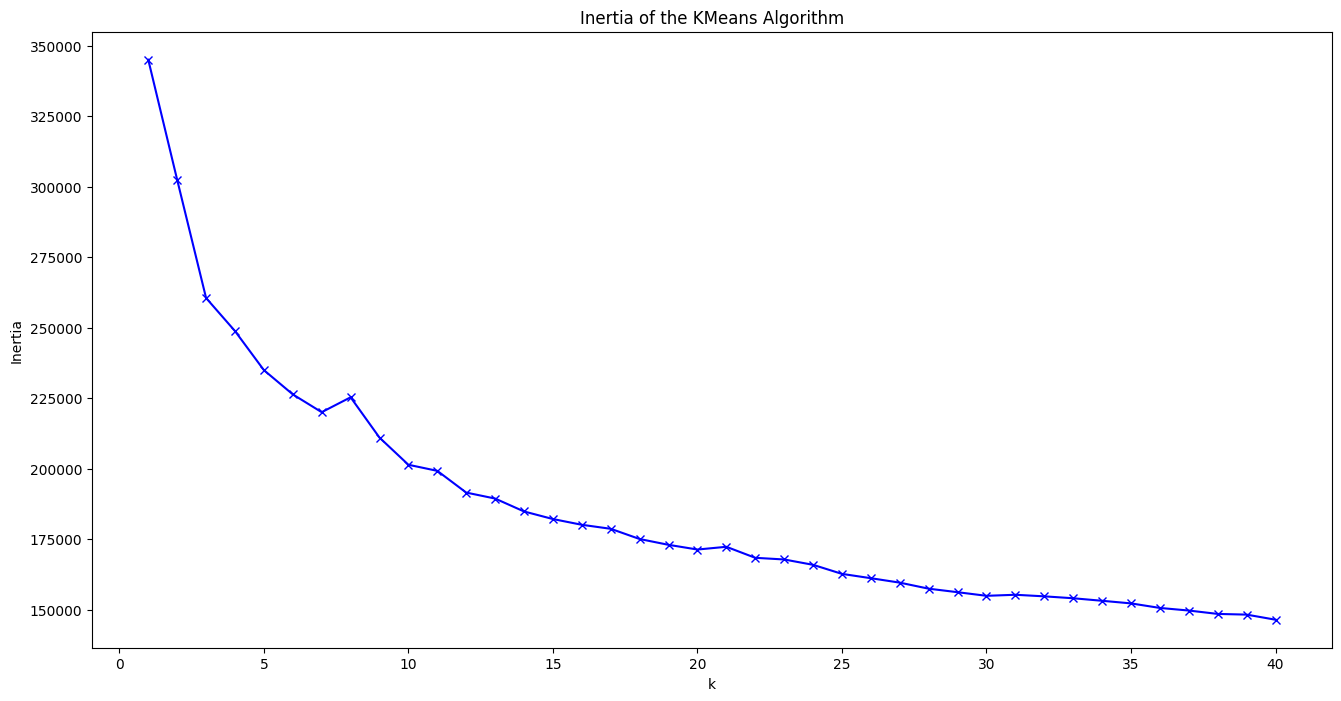

In [10]:
rnd = np.random.RandomState(42)
sample = rnd.randint(len(df), size=10000)

merchant_name_embeddings_sample = np.array(merchant_name_embeddings)[sample]
kmeans_elbow(merchant_name_embeddings_sample)

In [11]:
clusters = clustering_texts(merchant_name_embeddings, 10)

In [12]:
df_merchant_name_clusters = pd.DataFrame({"merchant_name": merchant_name, "cluster" : clusters})
df_merchant_name_clusters.sort_values("cluster", inplace=True)

In [13]:
for cl in range(10):
    display(df_merchant_name_clusters.query(f"cluster == {cl}").head(5))

,merchant_name,cluster
32255,sainsburys petrol,0
96897,sainsburys s/mkts,0
96884,sainsburys s/mkts,0
96879,sainsburys s/mkts,0
96870,sainsburys s/mkts,0


,merchant_name,cluster
63719,shell penhale,1
17732,tink n stink,1
80033,trade uk,1
10785,trainline,1
64741,mentor,1


,merchant_name,cluster
18113,www.johnlewis.com,2
54687,netflix.com,2
95194,www.screwfix.com,2
18112,www.printerland.co,2
18111,www.johnlewis.com,2


,merchant_name,cluster
48546,amznmktplace,3
78732,amznmktplace,3
82435,amznmktplace,3
94584,amznmktplace,3
45411,amznmktplace,3


,merchant_name,cluster
60486,asda groceries online,4
19519,tesco pay at pump 4003,4
46779,o2 uk payment,4
25720,tesco pay at pump 4231,4
87140,asda groceries online,4


,merchant_name,cluster
70870,msft e0100jheau,5
71128,amazon.co.uk2y8we86p4,5
80022,amazon 026-9612457-04,5
80023,amazon.co.uk147nf1ur4,5
19053,amazon.co.uk1a1q26184,5


,merchant_name,cluster
102664,www.wmca.co.uk,6
43578,www.ipsea.org.uk,6
3101,www.tts-groups.co.uk,6
43919,www.vipreading.co.uk,6
43207,water plus.co.uk,6


,merchant_name,cluster
57,rontec moseley,7
72591,trade washrooms,7
104626,mkg foods,7
73272,a cubed property ltd,7
71148,specialty risks ltd,7


,merchant_name,cluster
6508,m6 toll,8
59765,holiday inn hemel,8
5771,heathrow t3,8
86684,national space centre,8
56736,hm land registry - online,8


,merchant_name,cluster
95987,bush service station,9
95991,bush service station,9
96008,applegreen kingstanding,9
95990,applegreen kingstanding,9
2744,b q 1012,9


In [14]:
df["merchant_name_cluster"] = clusters

In [15]:
df.to_csv("../data/df_clean.csv", index=False)